In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 13.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-au1ufkg6
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-au1ufkg6
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 36bc9255901fa4afaf03d55fec913ec56888ed53
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
import tqdm
import csv
import itertools
from statistics import mean
from torch_geometric.utils import from_scipy_sparse_matrix
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mutag_dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Processing...
Done!


In [5]:
Explainability_name = 'XGNN'
Task_name = 'Graph Classification'
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/Edge_Limit/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True
DataSet_name = "MUTAG"

#File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

mutag_train_dataset = []
mutag_test_dataset = []
for index in read_training_list_indexes:
    mutag_train_dataset.append(mutag_dataset[index])
for index in read_test_list_indexes:
    mutag_test_dataset.append(mutag_dataset[index])


print(f'Number of training graphs: {len(mutag_train_dataset)}')
print(f'Number of test graphs: {len(mutag_test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
BATCH_SIZE = 64
mutag_train_dataloader = DataLoader(mutag_train_dataset, batch_size=BATCH_SIZE, shuffle=False) # important to be false
mutag_test_dataloader = DataLoader(mutag_test_dataset, batch_size=1, shuffle=False)

In [8]:
# from torch_geometric.datasets import FakeDataset

# num_graphs = 100
# avg_num_nodes = 20
# avg_degree = 15
# node_feat_dim = 13
# edge_feat_dim = 0
# num_classes = 3

# fake_dataset = FakeDataset(num_graphs=num_graphs, avg_num_nodes=avg_num_nodes, avg_degree=avg_degree, num_channels=node_feat_dim,
#                            edge_dim=edge_feat_dim, num_classes=num_classes,)
# Explainability_name = 'XGNN'
# Task_name = 'Graph Classification'
# classifier_bias = True
# DataSet_name = "Fake"
# BATCH_SIZE = 10
# classifier_lr = 0.001
# classifier_dropout = 0.1
# classifier_weight_decay = 1e-6

# train_ratio = 0.8

# fake_train_dataset = fake_dataset[:int(len(fake_dataset) * train_ratio)]
# fake_test_dataset = fake_dataset[len(fake_dataset) - int(len(fake_dataset) * train_ratio):]

# fake_train_dataloader = DataLoader(fake_train_dataset, batch_size=BATCH_SIZE, shuffle=False)
# fake_test_dataloader = DataLoader(fake_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [9]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)

import GCN_plus_GAP as Graph_Network
GNN_Model = Graph_Network.GCN_plus_GAP(model_name='GCN_plus_GAP', model_level='graph', input_dim=7, hidden_dim=7, output_dim=2,
                                       num_hid_layers=3, Bias=classifier_bias, act_fun='ReLu', Weight_Initializer=1,
                                       dropout_rate=classifier_dropout)

Model_name = GNN_Model.__class__.__name__
print("Model_name: ", Model_name)
File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
GCN_plus_GAP(
  (GConvs): ModuleList(
    (0-1): 2 x GCNConv(7, 7)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (readout): GlobalMeanPool()
  (ffn): Linear(in_features=7, out_features=2, bias=True)
)
GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 3
ReLu is Selected.
Model_name:  GCN_plus_GAP


In [10]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [11]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [12]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    #plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [13]:
def train_step(data):
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []
    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in data:

        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        batch_loss = loss_calculations(soft, batch_of_graphs.y)
        Pred_Labels.extend(soft.argmax(dim=1).detach().tolist())


        GNN_Model_loss_batch.append(batch_loss)
        Real_Labels.extend(batch_of_graphs.y.detach().tolist())

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [14]:
GNN_Model_training_time_per_epoch = []
GNN_Model_training_Acc_per_epoch = []
def train(EPOCHS, load_index, data):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        start_generation = perf_counter()
        GNN_Model_training_loss, training_acc = train_step(data)
        GNN_Model_training_time_per_epoch.append(perf_counter() - start_generation)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        #if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
        #    torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/Edge_Limit/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6931
Epoch: 002, Model Loss: 0.6931
Epoch: 003, Model Loss: 0.6931
Epoch: 004, Model Loss: 0.6931
Epoch: 005, Model Loss: 0.6931
Epoch: 006, Model Loss: 0.6931
Epoch: 007, Model Loss: 0.6931
Epoch: 008, Model Loss: 0.6931
Epoch: 009, Model Loss: 0.6931
Epoch: 010, Model Loss: 0.6931
Epoch: 011, Model Loss: 0.6931
Epoch: 012, Model Loss: 0.6931
Epoch: 013, Model Loss: 0.6931
Epoch: 014, Model Loss: 0.6931
Epoch: 015, Model Loss: 0.6931
Epoch: 016, Model Loss: 0.6931
Epoch: 017, Model Loss: 0.6931
Epoch: 018, Model Loss: 0.6931
Epoch: 019, Model Loss: 0.6931
Epoch: 020, Model Loss: 0.6931
Epoch: 021, Model Loss: 0.6931
Epoch: 022, Model Loss: 0.6931
Epoch: 023, Model Loss: 0.6931
Epoch: 024, Model Loss: 0.6931
Epoch: 025, Model Loss: 0.6931
Epoch: 026, Model Loss: 0.6931
Epoch: 027, Model Loss: 0.6931
Epoch: 028, Model Loss: 0.6931
Epoch: 029, Model Loss: 0.6931
Epoch: 030, Model Loss: 0.6931
Epoch: 031, Model Loss: 0.6931
Epoch: 032, Model Loss: 0.6931
Epoch: 0

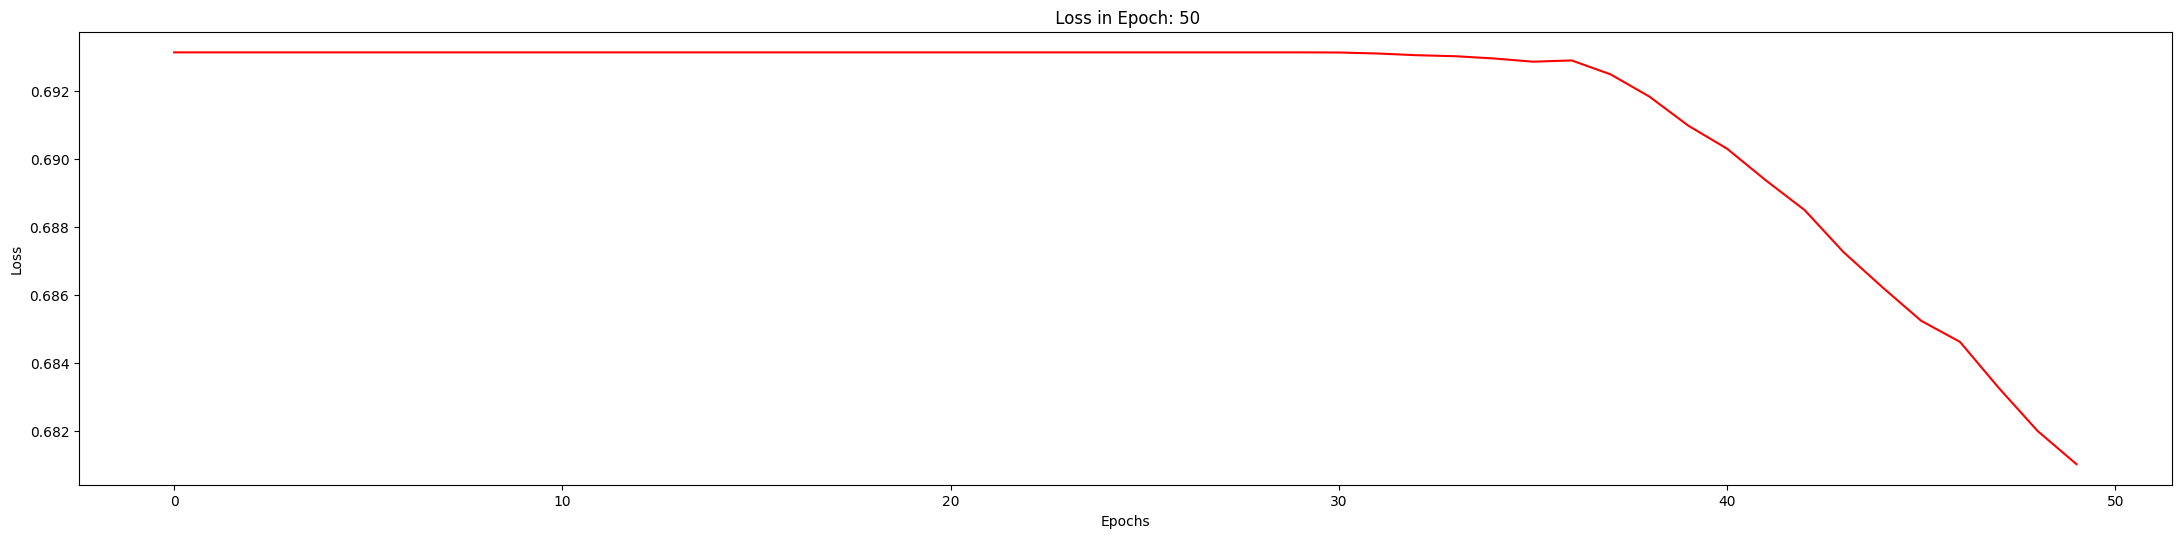

Epoch: 051, Model Loss: 0.6791
Epoch: 052, Model Loss: 0.6778
Epoch: 053, Model Loss: 0.6762
Epoch: 054, Model Loss: 0.6755
Epoch: 055, Model Loss: 0.6733
Epoch: 056, Model Loss: 0.6720
Epoch: 057, Model Loss: 0.6699
Epoch: 058, Model Loss: 0.6681
Epoch: 059, Model Loss: 0.6652
Epoch: 060, Model Loss: 0.6644
Epoch: 061, Model Loss: 0.6617
Epoch: 062, Model Loss: 0.6596
Epoch: 063, Model Loss: 0.6566
Epoch: 064, Model Loss: 0.6533
Epoch: 065, Model Loss: 0.6508
Epoch: 066, Model Loss: 0.6493
Epoch: 067, Model Loss: 0.6460
Epoch: 068, Model Loss: 0.6452
Epoch: 069, Model Loss: 0.6397
Epoch: 070, Model Loss: 0.6386
Epoch: 071, Model Loss: 0.6353
Epoch: 072, Model Loss: 0.6317
Epoch: 073, Model Loss: 0.6304
Epoch: 074, Model Loss: 0.6285
Epoch: 075, Model Loss: 0.6254
Epoch: 076, Model Loss: 0.6227
Epoch: 077, Model Loss: 0.6204
Epoch: 078, Model Loss: 0.6183
Epoch: 079, Model Loss: 0.6167
Epoch: 080, Model Loss: 0.6139
Epoch: 081, Model Loss: 0.6102
Epoch: 082, Model Loss: 0.6110
Epoch: 0

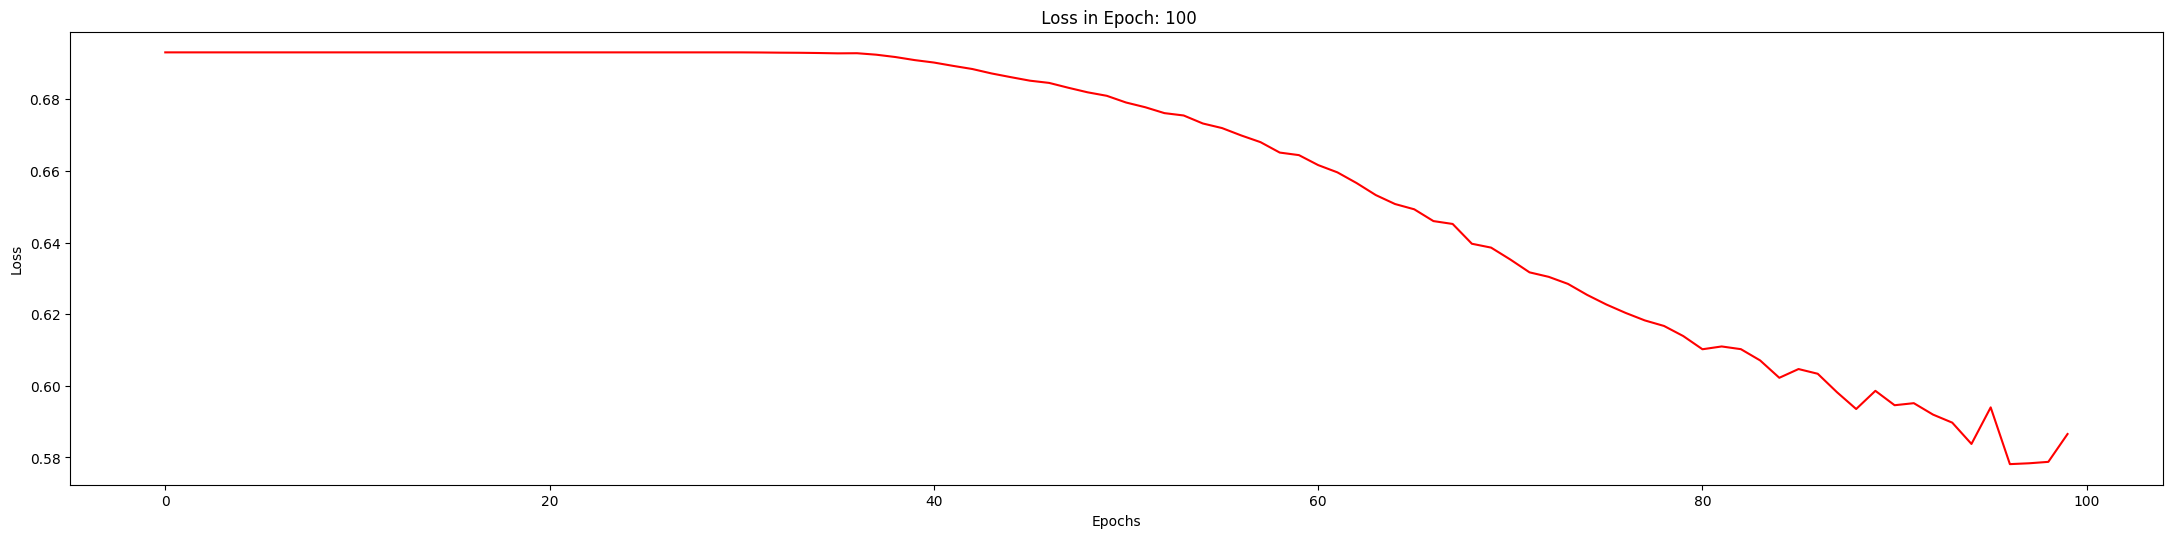

Epoch: 101, Model Loss: 0.5703
Epoch: 102, Model Loss: 0.5701
Epoch: 103, Model Loss: 0.5708
Epoch: 104, Model Loss: 0.5660
Epoch: 105, Model Loss: 0.5657
Epoch: 106, Model Loss: 0.5721
Epoch: 107, Model Loss: 0.5627
Epoch: 108, Model Loss: 0.5640
Epoch: 109, Model Loss: 0.5556
Epoch: 110, Model Loss: 0.5537
Epoch: 111, Model Loss: 0.5500
Epoch: 112, Model Loss: 0.5557
Epoch: 113, Model Loss: 0.5449
Epoch: 114, Model Loss: 0.5570
Epoch: 115, Model Loss: 0.5509
Epoch: 116, Model Loss: 0.5551
Epoch: 117, Model Loss: 0.5559
Epoch: 118, Model Loss: 0.5523
Epoch: 119, Model Loss: 0.5460
Epoch: 120, Model Loss: 0.5565
Epoch: 121, Model Loss: 0.5386
Epoch: 122, Model Loss: 0.5493
Epoch: 123, Model Loss: 0.5421
Epoch: 124, Model Loss: 0.5511
Epoch: 125, Model Loss: 0.5429
Epoch: 126, Model Loss: 0.5495
Epoch: 127, Model Loss: 0.5448
Epoch: 128, Model Loss: 0.5460
Epoch: 129, Model Loss: 0.5206
Epoch: 130, Model Loss: 0.5379
Epoch: 131, Model Loss: 0.5316
Epoch: 132, Model Loss: 0.5392
Epoch: 1

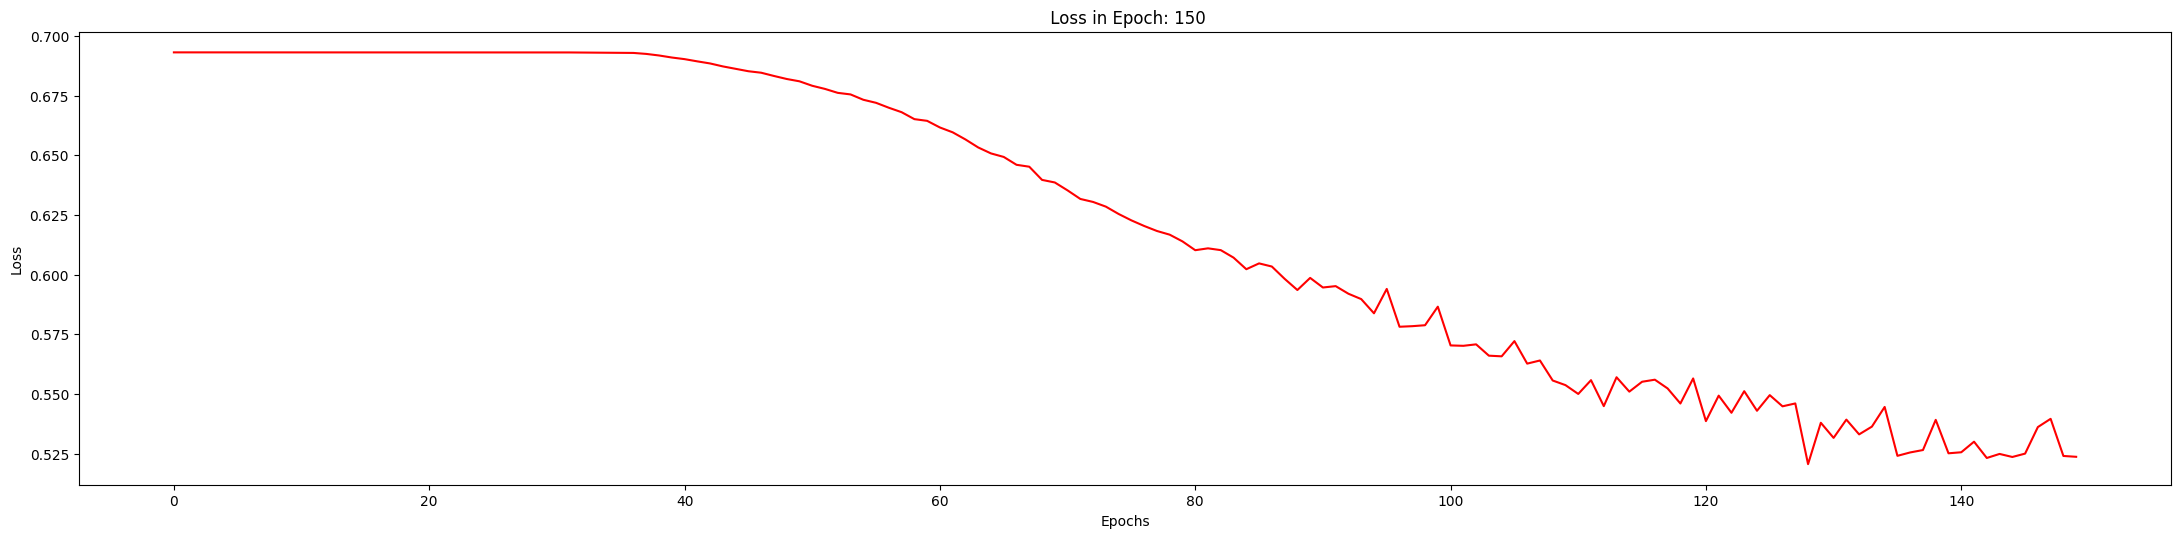

Epoch: 151, Model Loss: 0.5362
Epoch: 152, Model Loss: 0.5175
Epoch: 153, Model Loss: 0.5363
Epoch: 154, Model Loss: 0.5376
Epoch: 155, Model Loss: 0.5191
Epoch: 156, Model Loss: 0.5260
Epoch: 157, Model Loss: 0.5268
Epoch: 158, Model Loss: 0.5269
Epoch: 159, Model Loss: 0.5167
Epoch: 160, Model Loss: 0.5233
Epoch: 161, Model Loss: 0.5121
Epoch: 162, Model Loss: 0.5178
Epoch: 163, Model Loss: 0.5182
Epoch: 164, Model Loss: 0.5006
Epoch: 165, Model Loss: 0.5152
Epoch: 166, Model Loss: 0.5153
Epoch: 167, Model Loss: 0.5136
Epoch: 168, Model Loss: 0.5066
Epoch: 169, Model Loss: 0.4992
Epoch: 170, Model Loss: 0.5019
Epoch: 171, Model Loss: 0.5145
Epoch: 172, Model Loss: 0.5213
Epoch: 173, Model Loss: 0.5072
Epoch: 174, Model Loss: 0.4984
Epoch: 175, Model Loss: 0.5220
Epoch: 176, Model Loss: 0.5083
Epoch: 177, Model Loss: 0.5057
Epoch: 178, Model Loss: 0.5204
Epoch: 179, Model Loss: 0.5026
Epoch: 180, Model Loss: 0.5111
Epoch: 181, Model Loss: 0.5171
Epoch: 182, Model Loss: 0.5114
Epoch: 1

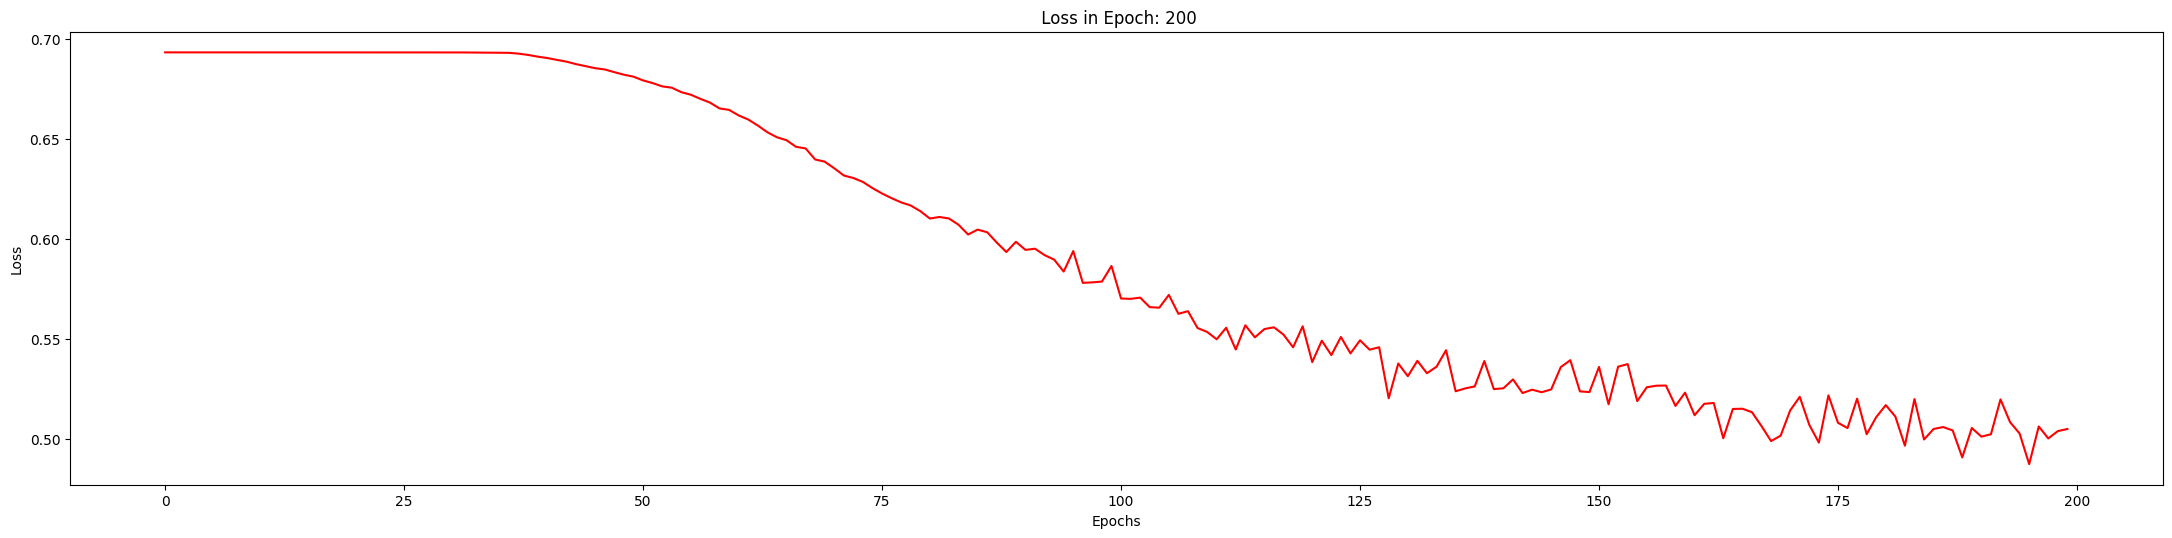

Epoch: 201, Model Loss: 0.4912
Epoch: 202, Model Loss: 0.4968
Epoch: 203, Model Loss: 0.4895
Epoch: 204, Model Loss: 0.4910
Epoch: 205, Model Loss: 0.5142
Epoch: 206, Model Loss: 0.4872
Epoch: 207, Model Loss: 0.5112
Epoch: 208, Model Loss: 0.5018
Epoch: 209, Model Loss: 0.5087
Epoch: 210, Model Loss: 0.4989
Epoch: 211, Model Loss: 0.4893
Epoch: 212, Model Loss: 0.5018
Epoch: 213, Model Loss: 0.4768
Epoch: 214, Model Loss: 0.5083
Epoch: 215, Model Loss: 0.4993
Epoch: 216, Model Loss: 0.4943
Epoch: 217, Model Loss: 0.5084
Epoch: 218, Model Loss: 0.4921
Epoch: 219, Model Loss: 0.4806
Epoch: 220, Model Loss: 0.4992
Epoch: 221, Model Loss: 0.5042
Epoch: 222, Model Loss: 0.5051
Epoch: 223, Model Loss: 0.4867
Epoch: 224, Model Loss: 0.4968
Epoch: 225, Model Loss: 0.5021
Epoch: 226, Model Loss: 0.5007
Epoch: 227, Model Loss: 0.4942
Epoch: 228, Model Loss: 0.4958
Epoch: 229, Model Loss: 0.5093
Epoch: 230, Model Loss: 0.5091
Epoch: 231, Model Loss: 0.4981
Epoch: 232, Model Loss: 0.4911
Epoch: 2

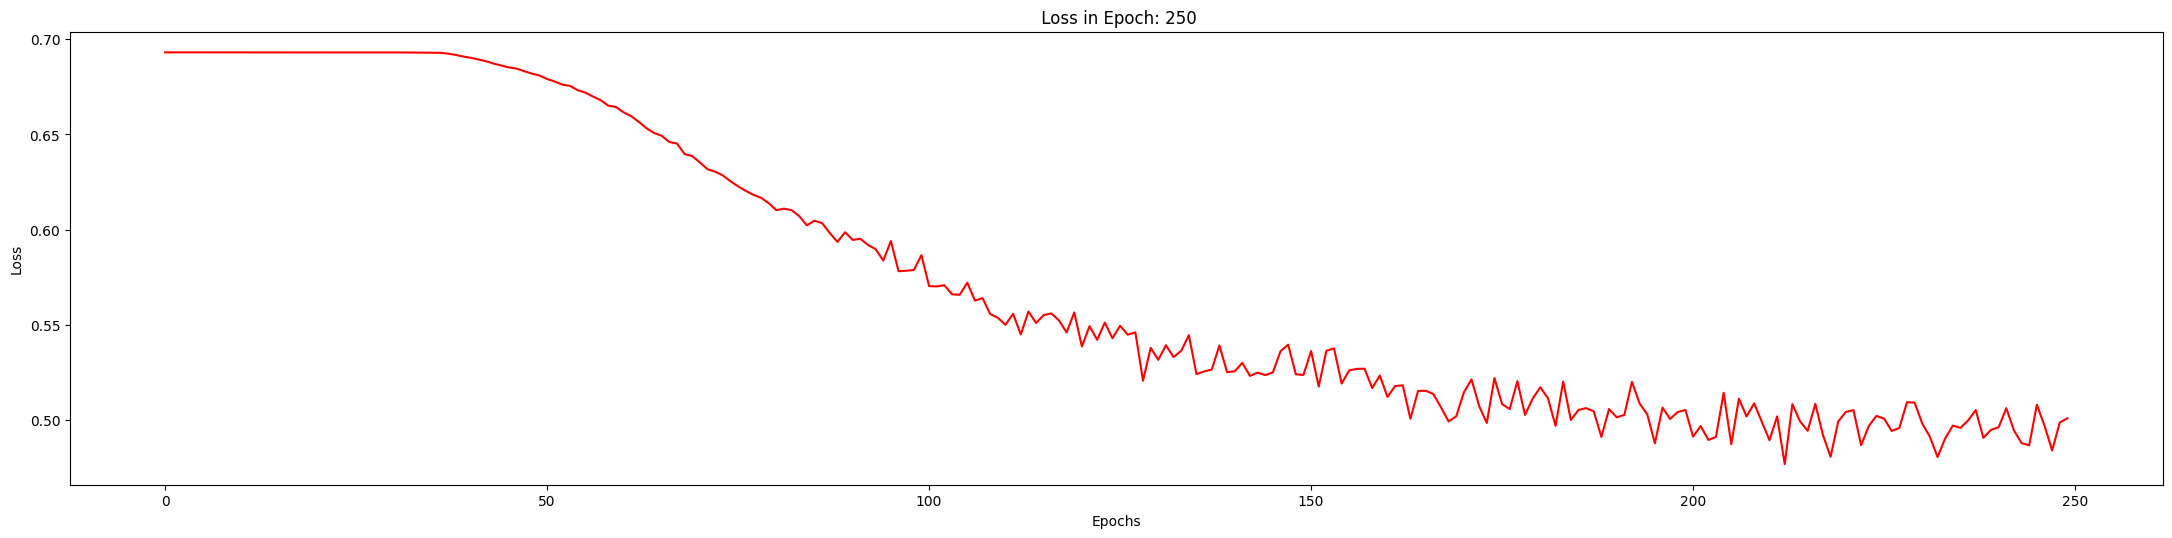

Epoch: 251, Model Loss: 0.4894
Epoch: 252, Model Loss: 0.4835
Epoch: 253, Model Loss: 0.4973
Epoch: 254, Model Loss: 0.4988
Epoch: 255, Model Loss: 0.4763
Epoch: 256, Model Loss: 0.4879
Epoch: 257, Model Loss: 0.4911
Epoch: 258, Model Loss: 0.4968
Epoch: 259, Model Loss: 0.4980
Epoch: 260, Model Loss: 0.4943
Epoch: 261, Model Loss: 0.5005
Epoch: 262, Model Loss: 0.4963
Epoch: 263, Model Loss: 0.4887
Epoch: 264, Model Loss: 0.4904
Epoch: 265, Model Loss: 0.4807
Epoch: 266, Model Loss: 0.4935
Epoch: 267, Model Loss: 0.4885
Epoch: 268, Model Loss: 0.4830
Epoch: 269, Model Loss: 0.4901
Epoch: 270, Model Loss: 0.4988
Epoch: 271, Model Loss: 0.5015
Epoch: 272, Model Loss: 0.4921
Epoch: 273, Model Loss: 0.4997
Epoch: 274, Model Loss: 0.4968
Epoch: 275, Model Loss: 0.4886
Epoch: 276, Model Loss: 0.4788
Epoch: 277, Model Loss: 0.5009
Epoch: 278, Model Loss: 0.4927
Epoch: 279, Model Loss: 0.4892
Epoch: 280, Model Loss: 0.4904
Epoch: 281, Model Loss: 0.4850
Epoch: 282, Model Loss: 0.4727
Epoch: 2

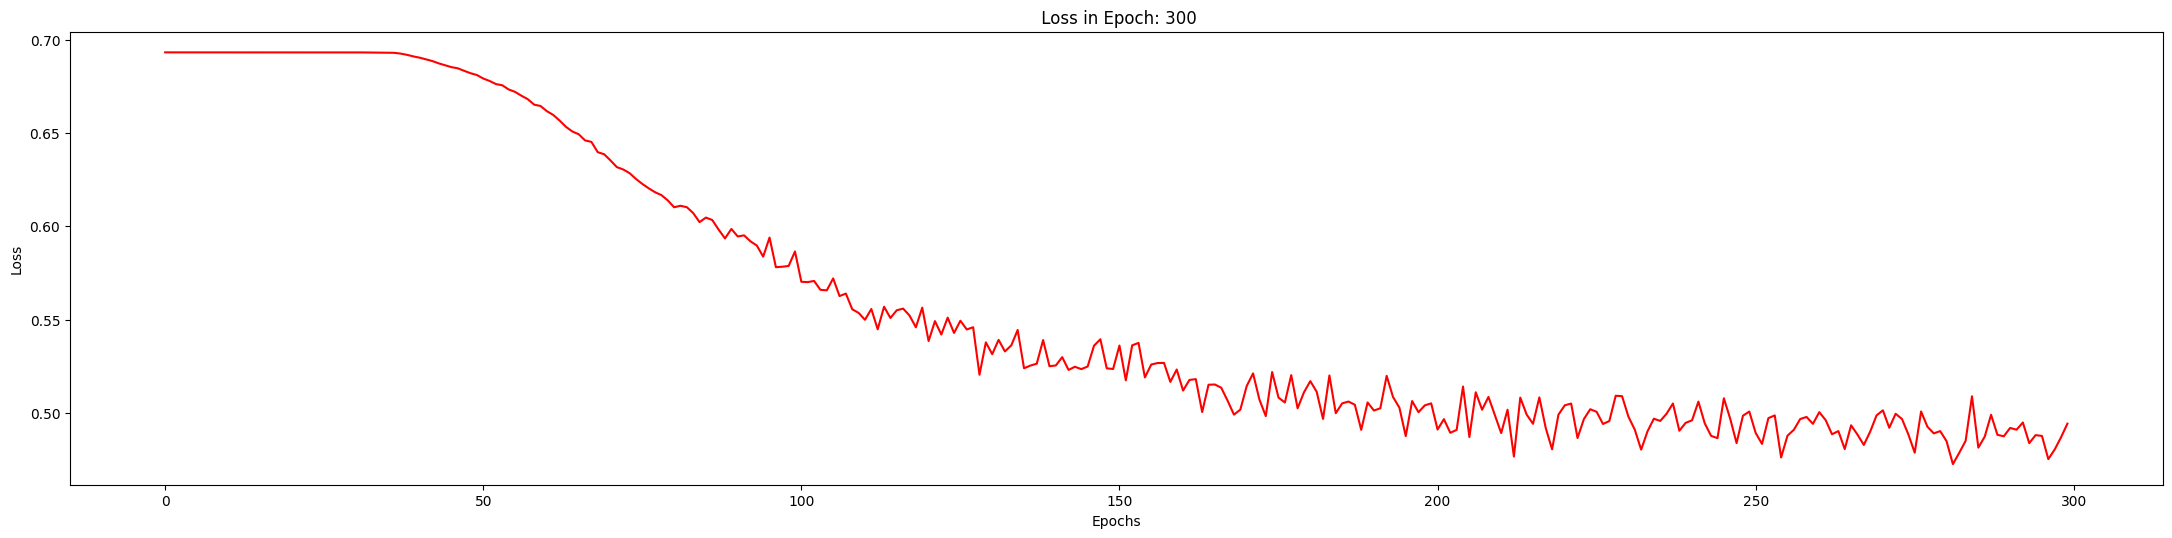

In [15]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index, mutag_train_dataloader)

In [16]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(testing):
    GNN_Model.eval()
    correct = 0

    for batch_of_graphs in testing:

        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        GNN_Model_test_pred = soft.argmax(dim=1)

        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred.tolist()[0])
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(testing), GNN_Model_test_predicted_labels

In [17]:
GNN_Model_test_acc, predictions = GNN_Model_test(mutag_test_dataset)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.6053


In [ ]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batched_data)
        CAM_test_pred = soft.argmax(dim=1)
        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [ ]:
samples_time = instance_time(mutag_test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.0025411170000211314, 0.001797911999972257, 0.0011499080000021422, 0.0012247679999859429, 0.0011950239999691803, 0.0011884859999895525, 0.0010717110000086905, 0.0010449620000372306, 0.001108902999988004, 0.0011001530000385173, 0.0010857679999958236, 0.001106493000008868, 0.0011951360000352906, 0.001050835000000916, 0.0010476379999886376, 0.0010769290000212095, 0.0012164709999638035, 0.0012021009999898524, 0.0011398639999811166, 0.0011075319999918065, 0.0010911719999739944, 0.001086531999987983, 0.0011025900000163347, 0.0011086609999892971, 0.0010925789999873814, 0.00113627300004282, 0.0014479879999953482, 0.001623416000029465, 0.0020700830000350834, 0.0014943070000299485, 0.0011889509999605252, 0.0011222669999710888, 0.001089078999996218, 0.001120721000006597, 0.0011593449999622862, 0.001142610999977478, 0.001096895999978642, 0.00109479600001805]


In [ ]:
print(predictions)
real_labels = []
for graph in mutag_test_dataset:
    real_labels.append(graph.y.detach().tolist()[0])
print(real_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]


In [ ]:
Auc_Roc = metrics.roc_auc_score(real_labels, predictions)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predictions)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predictions, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predictions, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.494047619047619 Auc_Prc:  0.7989348370927318 Acc:  0.6052631578947368 Acc2:  23


In [18]:
from torch.nn.modules.module import Module
from torch.nn import Linear
from torch.nn import ReLU6
from torch.nn import Sequential
import random
from torch_geometric.data import Data
from torch_geometric.utils import to_undirected
import copy




class XGNN_Graph_Generator(nn.Module):
    def __init__(self, GNN_Model, num_node_features, candidate_set_length, max_number_of_nodes, random_start, class_of_explanation,
                 hyp_for_rollout, hyp_for_rules, dropout_rate, rollout_count):
        super(XGNN_Graph_Generator, self).__init__()

        self.num_node_features = num_node_features
        self.candidate_set_length = candidate_set_length # Node Feature Dimensionality
        self.max_number_of_nodes = max_number_of_nodes
        self.random_start = random_start
        self.hyp_for_rollout = hyp_for_rollout
        self.hyp_for_rules = hyp_for_rules
        self.dropout_rate = dropout_rate
        self.rollout_count = rollout_count
        self.class_of_explanation = class_of_explanation
        self.GNN_Model = GNN_Model
        self.candidate_set = ['C.4', 'N.5', 'O.2', 'F.1', 'I.7', 'Cl.7', 'Br.5']
        self.candidate_set_dict = {0:4, 1:5, 2:2, 3:1, 4:7, 5:7, 6:5}
        #for param in self.GNN_Model.parameters():
        #    param.requires_grad = False
        self.GNN_Model.eval()

        # The first Dense layer
        self.the_first_dense = torch.nn.Linear(self.num_node_features, 8)

        # GCN Layers
        self.explainer_gcn_layers = nn.ModuleList([
            #Sparse_GCN(8, 16),
            #Sparse_GCN(16, 24),
            #Sparse_GCN(24, 32)
            GCNConv(8,16),
            GCNConv(16, 24),
            GCNConv(24, 32)
        ])

        # MLP1 for source node
        # 2 FC layers with hidden dimension 16
        self.mlp_source_node = torch.nn.Sequential(
            torch.nn.Linear(32, 16),
            torch.nn.ReLU6(),
            torch.nn.Linear(16, 1),
            torch.nn.Softmax(dim=0)
        )

        # MLP2 for target node
        # 2 FC layers with hidden dimension 24
        self.mlp_target_node = torch.nn.Sequential(
            torch.nn.Linear(64, 24),
            torch.nn.ReLU6(),
            torch.nn.Linear(24, 1),
            torch.nn.Softmax(dim=0)
        )
        self.intialize_random_graph()

    def intialize_random_graph(self):

        if self.random_start == True:
            self.starting_random_node_type = random.choice(np.arange(0, self.candidate_set_length))

        adj = torch.zeros((self.max_number_of_nodes + self.candidate_set_length, self.max_number_of_nodes + self.candidate_set_length), dtype=torch.float32)
        feat = torch.zeros((self.max_number_of_nodes + self.candidate_set_length, self.candidate_set_length), dtype=torch.float32)

        feat[0, self.starting_random_node_type] = 1
        feat[np.arange(-self.candidate_set_length, 0), np.arange(0, self.candidate_set_length)] = 1

        degrees = torch.zeros(self.max_number_of_nodes)

        mask_candidate_set = torch.BoolTensor([False if i == 0 else True for i in range(self.candidate_set_length + self.max_number_of_nodes)])

        self.Graph = {'adj': adj, 'feat': feat, 'degrees': degrees, 'num_nodes': 1, 'mask_candidate_set': mask_candidate_set}
        print("A random graph is initialized.")

    def compute_reward_for_graph_rules(self, Graph):
        """
        For mutag, node degrees cannot exceed valency
        """
        try:
            for i, deg in enumerate(Graph['degrees']):
                if deg != 0:
                    node_id = torch.argmax(Graph['feat'][i]).tolist()  # Eg. [0, 1, 0, 0] -> 1
                    #node = self.candidate_set[node_id]  # Eg ['C.4', 'F.2', 'Br.7'][1] = 'F.2'
                    #max_valency = int(node.split('.')[1])  # Eg. C.4 -> ['C', '4'] -> 4
                    max_valency = int(self.candidate_set_dict[node_id])

                    # If any node degree exceeds its valency, return -1
                    if max_valency < deg:
                        return -1
            return 0
        except:
            return 0


    def compute_reward_for_model_feedback(self, Graph):
        """
        p(f(Graph) = c) - 1/l
        where l denotes number of possible classes for f
        """

        row, col = Graph['adj'].nonzero().t()
        edge_index = to_undirected([row, col])
        data = Data(x=Graph['feat'], edge_index=edge_index)

        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, gnn_model_output = self.GNN_Model(data)

        return (torch.squeeze(gnn_model_output).tolist()[self.class_of_explanation] - 1 )/ len(torch.squeeze(gnn_model_output).tolist())


    def calculate_total_reward(self, Graph):

        reward_t_for_rules = self.compute_reward_for_graph_rules(Graph)
        #print("reward_t_for_rules passed: ", reward_t_for_rules)

        reward_t_for_model_feedback = self.compute_reward_for_model_feedback(Graph)
        #print("reward_t_for_model_feedback passed: ", reward_t_for_model_feedback)

        reward_t_for_model_feedback_sum = 0
        for m in range(self.rollout_count):
            source_node_probs, best_source_node_idx, target_node_probs, best_target_node_idx, Graph = self.forward(Graph)
            reward_t_for_model_feedback_sum += self.compute_reward_for_model_feedback(Graph)
        reward_t_for_model_feedback = reward_t_for_model_feedback + (reward_t_for_model_feedback_sum * self.hyp_for_rollout) / self.rollout_count

        return reward_t_for_model_feedback + self.hyp_for_rules * reward_t_for_rules

    def calculate_loss(self, total_reward_t, source_node_probs, best_source_node_idx, target_node_probs, best_target_node_idx, Graph):

        Lce_start = F.cross_entropy(torch.reshape(source_node_probs, (1, self.max_number_of_nodes+self.candidate_set_length)),
                                    best_source_node_idx.unsqueeze(0))
        Lce_end = F.cross_entropy(torch.reshape(target_node_probs, (1, self.max_number_of_nodes+self.candidate_set_length)),
                                  best_target_node_idx.unsqueeze(0))

        return -total_reward_t * (Lce_start + Lce_end)

    def forward(self, Graph):
        Graph_copy = copy.deepcopy(Graph)
        x = Graph_copy['feat']
        adj = Graph_copy['adj']
        edge_index = adj.nonzero().t().contiguous()

        x = F.dropout(F.relu6(self.the_first_dense(x)), p=self.dropout_rate, training=True)
        for gcn_layer in self.explainer_gcn_layers:
            x = F.dropout(F.relu6(gcn_layer(x, edge_index)), p=self.dropout_rate, training=True)

        first_mlp_output = self.mlp_source_node(x)
        source_node_probs = first_mlp_output.masked_fill(Graph_copy['mask_candidate_set'].unsqueeze(1), 0)
        best_source_node_idx = torch.argmax(source_node_probs.masked_fill(Graph_copy['mask_candidate_set'].unsqueeze(1), -1))

        x1, x2 = torch.broadcast_tensors(x, x[best_source_node_idx])
        x = torch.cat((x1, x2), 1)

        mask_for_target_node = torch.BoolTensor([True for i in range(self.candidate_set_length + self.max_number_of_nodes)])
        mask_for_target_node[self.max_number_of_nodes:] = False
        mask_for_target_node[:Graph_copy['num_nodes']] = False
        mask_for_target_node[best_source_node_idx] = True

        target_mlp_output = self.mlp_target_node(x)
        target_node_probs = target_mlp_output.masked_fill(mask_for_target_node.unsqueeze(1), 0)

        best_target_node_idx = torch.argmax(target_node_probs.masked_fill(mask_for_target_node.unsqueeze(1), -1))


        # Action = Add new Edge
        if Graph_copy['mask_candidate_set'][best_target_node_idx] == False:
            adj_cloned = Graph_copy['adj'].detach().clone()
            adj_cloned[best_source_node_idx][best_target_node_idx] = 1
            adj_cloned[best_target_node_idx][best_source_node_idx] = 1
            Graph_copy['adj'] = adj_cloned

            # Update degree vector
            Graph_copy['degrees'][best_source_node_idx] = Graph_copy['degrees'][best_source_node_idx] + 1
            Graph_copy['degrees'][best_target_node_idx] = Graph_copy['degrees'][best_target_node_idx] + 1


        # Action = Add new Node and new Edge
        elif Graph_copy['mask_candidate_set'][best_target_node_idx] == True:
            # Add a node
            feat_cloned = Graph_copy['feat'].detach().clone()
            feat_cloned[Graph_copy['num_nodes']] = feat_cloned[best_target_node_idx]
            Graph_copy['feat'] = feat_cloned

            # Add an edge
            adj_cloned = Graph_copy['adj'].detach().clone()
            adj_cloned[best_source_node_idx][Graph_copy['num_nodes']] = 1
            adj_cloned[Graph_copy['num_nodes']][best_source_node_idx] = 1
            Graph_copy['adj'] = adj_cloned

            # Update degree vector
            Graph_copy['degrees'][best_source_node_idx] = Graph_copy['degrees'][best_source_node_idx] + 1
            Graph_copy['degrees'][Graph_copy['num_nodes']] = Graph_copy['degrees'][Graph_copy['num_nodes']] + 1

            mask_candidate_set_copy = Graph_copy['mask_candidate_set'].detach().clone()
            mask_candidate_set_copy[Graph_copy['num_nodes']] = False
            Graph_copy['mask_candidate_set'] = mask_candidate_set_copy
            Graph_copy['num_nodes'] += 1


        return source_node_probs, best_source_node_idx, target_node_probs, best_target_node_idx, Graph_copy

In [62]:
class XGNN_training:
    def __init__(self, GNN_Model, max_geneneration_iterations, num_node_features, candidate_set_length, max_number_of_nodes,
                 random_start, rollout_count, class_of_explanation, hyp_for_rollout, hyp_for_rules, dropout_rate, explainer_lr,
                 b1, b2, weight_decay):

        self.GNN_Model = GNN_Model
        self.num_node_features = num_node_features
        self.candidate_set_length = candidate_set_length
        self.max_number_of_nodes = max_number_of_nodes
        self.random_start = random_start
        self.rollout_count = rollout_count
        self.class_of_explanation = class_of_explanation
        self.hyp_for_rollout = hyp_for_rollout
        self.hyp_for_rules = hyp_for_rules
        self.dropout_rate = dropout_rate
        self.explainer_lr = explainer_lr
        self.b1 = b1
        self.b2 = b2
        self.weight_decay = weight_decay
        self.max_geneneration_iterations = max_geneneration_iterations

        self.xgnn_explainer = XGNN_Graph_Generator(GNN_Model=self.GNN_Model, num_node_features=self.num_node_features,
                                                   candidate_set_length=self.candidate_set_length,
                                                   max_number_of_nodes=self.max_number_of_nodes, dropout_rate=self.dropout_rate,
                                                   random_start=self.random_start, rollout_count=self.rollout_count,
                                                   class_of_explanation=self.class_of_explanation, hyp_for_rollout=self.hyp_for_rollout,
                                                   hyp_for_rules=self.hyp_for_rules)

        self.explainer_optimizer = torch.optim.Adam(self.xgnn_explainer.parameters(), weight_decay=self.weight_decay,
                                                    lr=self.explainer_lr, betas=(self.b1, self.b2))

    def train_generator(self):
        self.xgnn_explainer.intialize_random_graph()
        Graph = copy.deepcopy(self.xgnn_explainer.Graph)
        self.xgnn_explainer.train()
        self.explainer_optimizer.zero_grad()
        for i in range(self.max_geneneration_iterations):
            self.explainer_optimizer.zero_grad()

            source_node_probs, best_source_node_idx, target_node_probs, best_target_node_idx, Graph = self.xgnn_explainer(Graph)

            total_reward_t = self.xgnn_explainer.calculate_total_reward(Graph)

            loss = self.xgnn_explainer.calculate_loss(total_reward_t, source_node_probs, best_source_node_idx, target_node_probs, best_target_node_idx, Graph)

            loss.backward(retain_graph=True)
            self.explainer_optimizer.step()

            if Graph['num_nodes'] >= self.max_number_of_nodes:
                self.xgnn_explainer.intialize_random_graph()
                print("Number of nodes passed the threshold.")
            elif total_reward_t > 0:
                self.xgnn_explainer.Graph = Graph

            print("Generation iTeration: ", i)
        return Graph

    def __call__(self, explainer_epochs):
        for i in range(explainer_epochs):
            trained_graph = self.train_generator()
            print("Number of nodes: ", trained_graph['num_nodes'])
            print("edge_index: ", trained_graph['adj'].nonzero().t().contiguous().size())

        #print(trained_graph['adj'].nonzero().t().contiguous())

In [65]:
class_of_explanation = 1
limit_count = 8
xgnn_training = XGNN_training(GNN_Model=GNN_Model, max_geneneration_iterations=10, num_node_features=7, candidate_set_length=7,
                              max_number_of_nodes=38, random_start=True, rollout_count=10, class_of_explanation=class_of_explanation, hyp_for_rollout=1,
                              hyp_for_rules=2, dropout_rate=0.5, explainer_lr=0.01, b1=0.9, b2=0.999, weight_decay=5e-4)
generated_graph = xgnn_training(explainer_epochs=20)

A random graph is initialized.
A random graph is initialized.
Generation iTeration:  0
Generation iTeration:  1
Generation iTeration:  2
Generation iTeration:  3
Generation iTeration:  4
Generation iTeration:  5
Generation iTeration:  6
Generation iTeration:  7
Generation iTeration:  8
Generation iTeration:  9
Number of nodes:  9
edge_index:  torch.Size([2, 20])
A random graph is initialized.
Generation iTeration:  0
Generation iTeration:  1
Generation iTeration:  2
Generation iTeration:  3
Generation iTeration:  4
Generation iTeration:  5
Generation iTeration:  6
Generation iTeration:  7
Generation iTeration:  8
Generation iTeration:  9
Number of nodes:  8
edge_index:  torch.Size([2, 16])
A random graph is initialized.
Generation iTeration:  0
Generation iTeration:  1
Generation iTeration:  2
Generation iTeration:  3
Generation iTeration:  4
Generation iTeration:  5
Generation iTeration:  6
Generation iTeration:  7
Generation iTeration:  8
Generation iTeration:  9
Number of nodes:  10

In [ ]:
import pickle
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'wb') as file:
    pickle.dump(generated_graph, file)

In [21]:
import pickle
class_of_explanation = 0
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'rb') as file:
    loaded_data_class0 = pickle.load(file)
print(loaded_data_class0['adj'].size())
loaded_data_class0['adj'] = loaded_data_class0['adj'].nonzero().t().contiguous()
print(loaded_data_class0['adj'].size())

torch.Size([45, 45])
torch.Size([2, 18])


In [22]:
import pickle
class_of_explanation = 1
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'rb') as file:
    loaded_data_class1 = pickle.load(file)
print(loaded_data_class1['adj'].size())
loaded_data_class1['adj'] = loaded_data_class1['adj'].nonzero().t().contiguous()
print(loaded_data_class1['adj'].size())

torch.Size([45, 45])
torch.Size([2, 20])


In [23]:
explanation_graph_class0 = Data(x=loaded_data_class0['feat'][:loaded_data_class0['num_nodes']], edge_index=loaded_data_class0['adj'], y=0)

In [24]:
explanation_graph_class1 = Data(x=loaded_data_class1['feat'][:loaded_data_class1['num_nodes']], edge_index=loaded_data_class1['adj'], y=1)

In [ ]:
print(explanation_graph_class0.x[explanation_graph_class0.edge_index.T])
print(mutag_dataset[5].x[mutag_dataset[5].edge_index.T])

In [26]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Model-level and Global Methods on Graph Classification/Script/'
sys.path.insert(0,py_path)
import evaluation_of_global_methods as isomorphism_scoring
isomorphism_scoring = reload(isomorphism_scoring)

from here

In [54]:
class global_explanation_and_samples_intersection:
    def __init__(self, explanation, input_graph):
        self.explanation = explanation
        self.input_graph = input_graph

    def pair_source_and_target_node_features(self, edges, node_feats):
        elements = ['C', 'N', 'O', 'F', 'I', 'Cl', 'Br']
        edge_pairs_name = {}
        paired_feat = {}
        for (source_index, target_index) in edges:
            paired_feat[(source_index, target_index)] = node_feats[source_index] + node_feats[target_index]
            edge_pairs_name[(source_index, target_index)] = str(elements[node_feats[source_index].index(max(node_feats[source_index]))]), str(elements[node_feats[target_index].index(max(node_feats[target_index]))])
        return paired_feat, edge_pairs_name

    def find_common_edges(self, ex_graph_node_features, ex_graph_edge_index, input_graph_node_features, input_graph_edge_index):

        ex_graph_edges = [(source1_index, target1_index) for source1_index, target1_index in ex_graph_edge_index.T.tolist()]
        input_graph_edges = [(source2_index, target2_index) for source2_index, target2_index in input_graph_edge_index.T.tolist()]

        ex_graph_paired_node_features, ex_graph_paired_nodes_names = self.pair_source_and_target_node_features(ex_graph_edges, ex_graph_node_features)
        input_graph_paired_node_features, input_graph_paired_nodes_names = self.pair_source_and_target_node_features(input_graph_edges, input_graph_node_features)

        common_edges = {}
        for (inp_graph_source_index, inp_graph_target_index), inp_graph_paired_feat in input_graph_paired_node_features.items():
            presence = 0
            for (ex_graph_source_index, ex_graph_target_index), ex_graph_paired_feat in ex_graph_paired_node_features.items():
                if inp_graph_paired_feat == ex_graph_paired_feat:
                    presence = 1
            if presence == 1:
                common_edges[(inp_graph_source_index, inp_graph_target_index)] = 1
            else:
                common_edges[(inp_graph_source_index, inp_graph_target_index)] = 0

        return common_edges, ex_graph_paired_nodes_names, input_graph_paired_nodes_names
    def __call__(self):
        return self.find_common_edges(self.explanation.x.tolist(), self.explanation.edge_index, self.input_graph.x.tolist(), self.input_graph.edge_index)

In [61]:
print("mutag_test_dataset[1]: ", mutag_test_dataset[1].y)
common_edges_finder = global_explanation_and_samples_intersection(explanation=explanation_graph_class1, input_graph=mutag_test_dataset[1])
intersection_edges, ex_graph_paired_nodes_names, input_graph_paired_nodes_names = common_edges_finder()
for key, value in intersection_edges.items():
    print("key: ", key, "value: ", value)
for key, value in ex_graph_paired_nodes_names.items():
    print("key: ", key, "value: ", value)
for key, value in input_graph_paired_nodes_names.items():
    print("key: ", key, "value: ", value)

mutag_test_dataset[1]:  tensor([0])
key:  (0, 1) value:  0
key:  (0, 9) value:  0
key:  (1, 0) value:  0
key:  (1, 2) value:  0
key:  (2, 1) value:  0
key:  (2, 3) value:  0
key:  (2, 7) value:  0
key:  (3, 2) value:  0
key:  (3, 4) value:  0
key:  (4, 3) value:  0
key:  (4, 5) value:  0
key:  (5, 4) value:  0
key:  (5, 6) value:  0
key:  (6, 5) value:  0
key:  (6, 7) value:  0
key:  (7, 2) value:  0
key:  (7, 6) value:  0
key:  (7, 8) value:  0
key:  (8, 7) value:  0
key:  (8, 9) value:  0
key:  (8, 10) value:  0
key:  (9, 0) value:  0
key:  (9, 8) value:  0
key:  (10, 8) value:  0
key:  (10, 11) value:  0
key:  (10, 12) value:  0
key:  (11, 10) value:  0
key:  (12, 10) value:  0
key:  (0, 1) value:  ('Br', 'C')
key:  (0, 2) value:  ('Br', 'Cl')
key:  (0, 7) value:  ('Br', 'I')
key:  (0, 8) value:  ('Br', 'C')
key:  (1, 0) value:  ('C', 'Br')
key:  (2, 0) value:  ('Cl', 'Br')
key:  (2, 3) value:  ('Cl', 'Br')
key:  (3, 2) value:  ('Br', 'Cl')
key:  (3, 4) value:  ('Br', 'Br')
key:  (3

to here

## **Evaluation Metrics**

Fid+

In [27]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_plus as eval_xai_fid_plus
eval_xai_fid_plus = reload(eval_xai_fid_plus)

In [28]:
explanation_list_class0_tensor = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class0, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class0_tensor.append(torch.from_numpy(np.array(list(intersection_edges.values()))))

In [29]:
explanation_list_class1_tensor = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class1, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class1_tensor.append(torch.from_numpy(np.array(list(intersection_edges.values()))))

In [30]:
saliency_maps = {}
saliency_maps[0] = explanation_list_class0_tensor
saliency_maps[1] = explanation_list_class1_tensor

In [31]:
fid_plus_xmethod_example = eval_xai_fid_plus.evalaution_of_xmethods_fidelity_plus(a_trained_model=GNN_Model, test_data=mutag_test_dataset)
fid_plus_score = fid_plus_xmethod_example.my_fidelity(saliencies_for_multiple_classes=saliency_maps , importance_threshold=0.01, style="Edge")
print(fid_plus_score)

0.17261904761904767


Fid-

In [32]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_minus as eval_xai_fid_minus
eval_xai_fid_minus = reload(eval_xai_fid_minus)

In [38]:
fid_minus_xmethod_example = eval_xai_fid_minus.evalaution_of_xmethods_fidelity_minus(a_trained_model=GNN_Model, test_data=mutag_test_dataset)
fid_minus_score = fid_minus_xmethod_example.my_fidelity(saliencies_for_multiple_classes=saliency_maps, importance_threshold=0.01, style="Edge")
print(fid_minus_score)

0.17261904761904767


In [39]:
explanation_list_class0 = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class0, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class0.append(list(intersection_edges.values()))

In [40]:
explanation_list_class1 = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class1, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class1.append(list(intersection_edges.values()))

Contrastivity

In [41]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_contrastivity as eval_xai_contrastivity
eval_xai_contrastivity = reload(eval_xai_contrastivity)

In [42]:
saliency_maps = {}
saliency_maps[0] = explanation_list_class0
saliency_maps[1] = explanation_list_class1

In [43]:
contrastivity_xmethod_example = eval_xai_contrastivity.evalaution_of_xmethods_contrastivity(a_trained_model=GNN_Model, test_data=mutag_test_dataset)
contrastivity_score = contrastivity_xmethod_example.my_contrastivity(mutag_test_dataset, saliencies_for_multiple_classes=saliency_maps,
                                                                     importance_threshold=0.5, contrast_coeff=1)
print("Contrastivity_Score: ", contrastivity_score)

Contrastivity_Score:  0.0


Sparsity

In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_sparsity as eval_xai_sparsity
eval_xai_sparsity = reload(eval_xai_sparsity)

In [ ]:
sparsity_xmethod_example = eval_xai_sparsity.evalaution_of_xmethods_sparsity(a_trained_model=GNN_Model, test_data=mutag_test_dataset)
sparsity_score = sparsity_xmethod_example.my_sparsity(mutag_test_dataset, saliencies_for_multiple_classes=saliency_maps, importance_threshold=0.5)
print("Sparsity_Score: ", sparsity_score)

Sparsity_Score:  1.0


In [ ]:
x = torch.tensor([2, 1, 5, 6, 3, 7], dtype=torch.float)
print(min(x))

tensor(1.)


Stability

In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_stability as eval_xai_stability
eval_xai_stability = reload(eval_xai_stability)

In [ ]:
stability = eval_xai_stability.evalaution_of_xmethods_stability(GNN_Model, mutag_test_dataset)
perturbed_mutag_test_dataset = stability.perturb_node_features_of_dataset(mutag_test_dataset, 0.1, 0.1)

In [ ]:
class evalaution_of_xmethods_stability(object):
    def __init__(self, a_trained_model, test_data):
        """
            Perturb Node Features for Entire Dataset
            Explain perturbed dataset
            Compute their distance
        """
        super(evalaution_of_xmethods_stability, self).__init__()

        self.a_trained_model = a_trained_model
        self.test_data = test_data


    def normalize_saliency_node_features_based(self, sal_maps):
        Graphs_new_gradients = []
        for graph_grads in sal_maps:
            new_gradients = []
            for node_grads in graph_grads:
                node_gradients = []
                for dim in node_grads:
                    node_gradients.append((dim-min(node_grads))/(max(node_grads)-min(node_grads)) if (max(node_grads)-min(node_grads)) != 0 else 0)
                new_gradients.append(node_gradients)
            Graphs_new_gradients.append(new_gradients)

        return Graphs_new_gradients

    def normalize_saliency_node_based(self, sal_maps):
        Graphs_new_gradients = []
        for graph_grads in sal_maps:
            new_gradients = []
            for node_grads in graph_grads:
                val = (node_grads-min(graph_grads))/(max(graph_grads)-min(graph_grads)) if (max(graph_grads)-min(graph_grads)) != 0 else 0
                new_gradients.append(val)
            Graphs_new_gradients.append(new_gradients)

        return Graphs_new_gradients

    def normalize_stability_distance(self, distance_list):
        normalized_distance_list = []
        for exp_diff in distance_list:
            val = (exp_diff-min(distance_list))/(max(distance_list)-min(distance_list)) if (max(distance_list)-min(distance_list)) != 0 else 0
            normalized_distance_list.append(val)
        return normalized_distance_list

    def perturb_node_features_of_dataset(self, dataset, mean, std):
        dataset_perturbed = deepcopy(dataset)
        for graph in dataset_perturbed:
            continuous_noise = torch.ones(dataset[0].x.size()[1]).normal_(mean, std)
            graph.x += continuous_noise
        return dataset_perturbed

    def dist_explanation(self, normal_saliency, perturbed_saliency, top_k_features):
        distance_list = []
        for normal_graph, perturbed_graph in zip(normal_saliency, perturbed_saliency):
            perturbed_graph = np.array(perturbed_graph)
            perturbed_graph = torch.from_numpy(perturbed_graph)
            normal_graph = np.array(normal_graph)
            normal_graph = torch.from_numpy(normal_graph)

            normal_graph_mask = torch.where(normal_graph >= normal_graph.topk(top_k_features)[0][-1].item(),
                                            torch.ones_like(normal_graph), torch.zeros_like(normal_graph))
            perturbed_graph_mask = torch.where(perturbed_graph >= perturbed_graph.topk(top_k_features)[0][-1].item(),
                                                torch.ones_like(perturbed_graph), torch.zeros_like(perturbed_graph))

            distance = F.pairwise_distance(normal_graph_mask.unsqueeze(dim=0), perturbed_graph_mask.unsqueeze(dim=0), p=1) / normal_graph_mask.size()[0]
            distance_list.append(distance.tolist()[0])
        return distance_list

    def one_graph_all_together(self, normal_saliency, perturbed_saliency):
        normal_saliency_list = []
        perturbed_saliency_list = []
        for normal_graph, perturbed_graph in zip(normal_saliency, perturbed_saliency):
            normal_saliency_list.append([node_feat for node in normal_graph for node_feat in node])
            perturbed_saliency_list.append([node_feat for node in perturbed_graph for node_feat in node])
        return perturbed_saliency_list, perturbed_saliency_list

    def distance_thresholding_node_features(self, distance_list, importance_threshold):
        stability_list = []
        for graph_score in distance_list:
            if importance_threshold == graph_score == 0:
                stability_list.append(1)
            if importance_threshold == graph_score == 1:
                stability_list.append(0)
            if importance_threshold < graph_score:
                stability_list.append(1 - graph_score)
            else:
                stability_list.append(0)
        return stability_list

    def normalize_saliency_edge_based(self, saliency_maps):
        Graphs_new_gradients = []

        for graph_grads in saliency_maps:
            #new_gradients = []
            for edge_grads in graph_grads:
                edge_grads = (edge_grads-torch.min(graph_grads))/(torch.max(graph_grads)-torch.min(graph_grads)) if (torch.max(graph_grads)-torch.min(graph_grads)) != 0 else 0
                #new_gradients.append(val)
            Graphs_new_gradients.append(graph_grads.tolist())

        return Graphs_new_gradients

    def my_stability(self, normal_saliencies, perturbed_saliencies, top_k_features, importance_threshold, style):
        if style == "Node Feature":
            try:
                normal_saliencies_binarized = {}
                perturbed_saliencies_binarized = {}
                for key, value in normal_saliencies.items():
                    normal_saliencies_binarized[key] = self.normalize_saliency_node_features_based(normal_saliencies[key])
                    perturbed_saliencies_binarized[key] = self.normalize_saliency_node_features_based(perturbed_saliencies[key])

                normal_saliencies_binarized_list = {}
                perturbed_saliencies_binarized_list = {}
                for key, value in normal_saliencies_binarized_list.items():
                    normal_saliencies_binarized_list[key], perturbed_saliencies_binarized_list[key] = self.one_graph_all_together(normal_saliencies_binarized_list[key], perturbed_saliencies_binarized_list[key])

                distance_list_by_class = {}
                for key, value in normal_saliencies_binarized_list.items():
                    distance_list_by_class[key] = self.dist_explanation(normal_saliencies_binarized_list[key], perturbed_saliencies_binarized_list[key], top_k_features)

                distance_list_by_class_normalized = {}
                for key, value in distance_list_by_class.items():
                    distance_list_by_class_normalized[key] = self.normalize_stability_distance(distance_list_by_class[key])

                distance_thresholding_node_features_dict = {}
                for key, value in distance_list_by_class_normalized.items():
                    distance_thresholding_node_features_dict[key] = self.distance_thresholding_node_features(distance_list_by_class_normalized[key], importance_threshold)
                final_output = []
                for values in distance_thresholding_node_features_dict.values():
                    final_output.append(mean(values))
                return mean(final_output)
            except:
                print("attributions are not in appropriate shape")
        elif style == "Node":
            try:
                normal_saliencies_binarized = {}
                perturbed_saliencies_binarized = {}
                for key, value in normal_saliencies.items():
                    normal_saliencies_binarized[key] = self.normalize_saliency_node_based(normal_saliencies[key])
                    perturbed_saliencies_binarized[key] = self.normalize_saliency_node_based(perturbed_saliencies[key])

                distance_list_by_class = {}
                for key, value in normal_saliencies_binarized.items():
                    distance_list_by_class[key] = self.dist_explanation(normal_saliencies_binarized[key], perturbed_saliencies_binarized[key], top_k_features)

                distance_list_by_class_normalized = {}
                for key, value in distance_list_by_class.items():
                    distance_list_by_class_normalized[key] = self.normalize_stability_distance(distance_list_by_class[key])

                distance_thresholding_node_features_dict = {}
                for key, value in distance_list_by_class_normalized.items():
                    distance_thresholding_node_features_dict[key] = self.distance_thresholding_node_features(distance_list_by_class_normalized[key], importance_threshold)
                final_output = []
                for values in distance_thresholding_node_features_dict.values():
                    final_output.append(mean(values))
                return mean(final_output)
            except:
                print("attributions are not in appropriate shape")
        elif style =="Edge":
            try:
                normal_saliencies_binarized = {}
                perturbed_saliencies_binarized = {}
                for key, value in normal_saliencies.items():
                    normal_saliencies_binarized[key] = self.normalize_saliency_edge_based(normal_saliencies[key])
                    perturbed_saliencies_binarized[key] = self.normalize_saliency_edge_based(perturbed_saliencies[key])

                distance_list_by_class = {}
                for key, value in normal_saliencies_binarized.items():
                    distance_list_by_class[key] = self.dist_explanation(normal_saliencies_binarized[key], perturbed_saliencies_binarized[key], top_k_features)

                distance_list_by_class_normalized = {}
                for key, value in distance_list_by_class.items():
                    distance_list_by_class_normalized[key] = self.normalize_stability_distance(distance_list_by_class[key])


                distance_thresholding_node_features_dict = {}
                for key, value in distance_list_by_class_normalized.items():
                    distance_thresholding_node_features_dict[key] = self.distance_thresholding_node_features(distance_list_by_class_normalized, importance_threshold)
                final_output = []
                for values in distance_thresholding_node_features_dict.values():
                    final_output.append(mean(values))
                return mean(final_output)
            except:
                print("attributions are not in appropriate shape")
        else:
            print("node based not covered yet")

In [ ]:
import pickle
class_of_explanation = 0
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'rb') as file:
    loaded_data_class0 = pickle.load(file)
print(loaded_data_class0['adj'].size())
loaded_data_class0['adj'] = loaded_data_class0['adj'].nonzero().t().contiguous()
print(loaded_data_class0['adj'].size())

torch.Size([45, 45])
torch.Size([2, 18])


In [ ]:
import pickle
class_of_explanation = 0
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Perturbed_Features_Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'rb') as file:
    loaded_data_class0_perturbed = pickle.load(file)
print(loaded_data_class0_perturbed['adj'].size())
loaded_data_class0_perturbed['adj'] = loaded_data_class0_perturbed['adj'].nonzero().t().contiguous()
print(loaded_data_class0_perturbed['adj'].size())

torch.Size([45, 45])
torch.Size([2, 16])


In [ ]:
import pickle
class_of_explanation = 1
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'rb') as file:
    loaded_data_class1 = pickle.load(file)
print(loaded_data_class1['adj'].size())
loaded_data_class1['adj'] = loaded_data_class1['adj'].nonzero().t().contiguous()
print(loaded_data_class1['adj'].size())

torch.Size([45, 45])
torch.Size([2, 20])


In [ ]:
import pickle
class_of_explanation = 1
file_path = '/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/Edge_Limit/' + File_Name + 'Perturbed_Features_Limited_Edge_Explanation_Class_' + str(class_of_explanation)
with open(file_path, 'rb') as file:
    loaded_data_class1_perturbed = pickle.load(file)
print(loaded_data_class1_perturbed['adj'].size())
loaded_data_class1_perturbed['adj'] = loaded_data_class1_perturbed['adj'].nonzero().t().contiguous()
print(loaded_data_class1_perturbed['adj'].size())

torch.Size([45, 45])
torch.Size([2, 18])


In [ ]:
length = max([loaded_data_class0['num_nodes'], loaded_data_class1['num_nodes'], loaded_data_class0_perturbed['num_nodes'], loaded_data_class1_perturbed['num_nodes']])

In [ ]:
print(length)

10


In [ ]:
explanation_graph_class0 = Data(x=loaded_data_class0['feat'][:length], edge_index=loaded_data_class0['adj'], y=0)
explanation_graph_class0_perturbed = Data(x=loaded_data_class0_perturbed['feat'][:length], edge_index=loaded_data_class0_perturbed['adj'], y=0)

explanation_graph_class1 = Data(x=loaded_data_class1['feat'][:length], edge_index=loaded_data_class1['adj'], y=1)
explanation_graph_class1_perturbed = Data(x=loaded_data_class1_perturbed['feat'][:length], edge_index=loaded_data_class1_perturbed['adj'], y=1)

## **iSomorphism Check**

In [ ]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Model-level and Global Methods on Graph Classification/Script/'
sys.path.insert(0,py_path)
import evaluation_of_global_methods as isomorphism_scoring
isomorphism_scoring = reload(isomorphism_scoring)

In [ ]:
explanation_list_class0_tensor = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class0, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class0_tensor.append(torch.from_numpy(np.array(list(intersection_edges.values()))))

In [ ]:
explanation_list_class0_perturbed_tensor = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class0_perturbed, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class0_perturbed_tensor.append(torch.from_numpy(np.array(list(intersection_edges.values()))))

In [ ]:
print(explanation_list_class0)
for listed in explanation_list_class0:
    print(len(listed))

In [ ]:
explanation_list_class1_tensor = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class1, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class1_tensor.append(torch.from_numpy(np.array(list(intersection_edges.values()))))

In [ ]:
explanation_list_class1_perturbed_tensor = []
for i in range(len(mutag_test_dataset)):
    common_edges_finder = isomorphism_scoring.global_explanation_and_samples_intersection(explanation=explanation_graph_class1_perturbed, input_graph=mutag_test_dataset[i])
    intersection_edges = common_edges_finder()
    explanation_list_class1_perturbed_tensor.append(torch.from_numpy(np.array(list(intersection_edges.values()))))

In [ ]:
print(explanation_list_class1)
for listed in explanation_list_class1:
    print(len(listed))

In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_stability as eval_xai_stability
eval_xai_stability = reload(eval_xai_stability)

In [ ]:
print(explanation_graph_class0.x)
print(explanation_graph_class0_perturbed.x)

In [ ]:
normal_saliency_maps = {}
normal_saliency_maps[0] = explanation_list_class0_tensor
normal_saliency_maps[1] = explanation_list_class1_tensor

perturbed_saliency_maps = {}
perturbed_saliency_maps[0] = explanation_list_class0_perturbed_tensor
perturbed_saliency_maps[1] = explanation_list_class1_perturbed_tensor

In [ ]:
stability = evalaution_of_xmethods_stability(GNN_Model, mutag_test_dataset)
stability_score = stability.my_stability(normal_saliencies=normal_saliency_maps, perturbed_saliencies=perturbed_saliency_maps,
                                         top_k_features=2, importance_threshold=0.1, style='Edge')
print(stability_score)

0
